# PSET 2 Code - Move to .rmd file later

In [1]:
# The needed libraries
library(tidyverse)
library(stargazer)
library(FNN)
library(kableExtra)
library(glmnet)
library(ggplot2)

# Ask R to not present numbers using scientific notation
options(scipen = 999)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Warning message:
“package ‘FNN’ was built under R version 4.2.3”

Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

### Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0

In [2]:
# make a dataframe of data
data <- data.frame(
  X1 = c(0, 1, 2, 1, 0, 1, 1),
  X2 = c(3.5, 2.1, 4.7, 3.9, 2.9, 1.5, 3.5),
  X3 = c(2, 3, 1, 1, 2, 2, 4),
  Y = c(2, 1, 3, 2, 4, 1, 2)
)

# Create a test point with all zeroes
test_point <- c(0, 0, 0)

# Calculate Euclidean distances
distances <- round(sqrt(rowSums((data[, 1:3] - test_point)^2)),2)

# Create a data frame to display the distances nicely
distance_df <- data.frame(Points = rownames(data), Distance = distances)

# Display the euclidean distances
title <- "Euclidean Distances from Test Point"
cat(title, "\n")
cat(rep("-", nchar(title)), "\n")

# Display the dataframe
print(distance_df)


Euclidean Distances from Test Point 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  Points Distance
1      1     4.03
2      2     3.80
3      3     5.20
4      4     4.15
5      5     3.52
6      6     2.69
7      7     5.41


## What is your prediction with K = 2? Why?

In [3]:
# Perform kNN regression with k = 2
predicted_values <- knn.reg(data[, 1:3], test_point, data$Y, k = 2)

# Access the predicted numeric value from the list
predicted_value <- predicted_values$pred

# Round the predicted value to the nearest integer
rounded_predicted_value <- ceiling(predicted_value)

# Display the predicted value
cat("The predicted value of (0,0,0) when k=2 is:", rounded_predicted_value, "\n")

The predicted value of (0,0,0) when k=2 is: 3 


### decision boundaries

In cases of highly nonlinear Bayes decision boundaries, a smaller K in the K-nearest neighbors (KNN) algorithm is preferred. This choice offers increased flexibility, aiding in capturing complex relationships within the data. However, caution is necessary to avoid overfitting, as small K values may lead to sensitivity to noise and outliers. Despite this, smaller K values excel at capturing local structures crucial for nonlinear decision boundaries, thus balancing model flexibility with the risk of overfitting.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


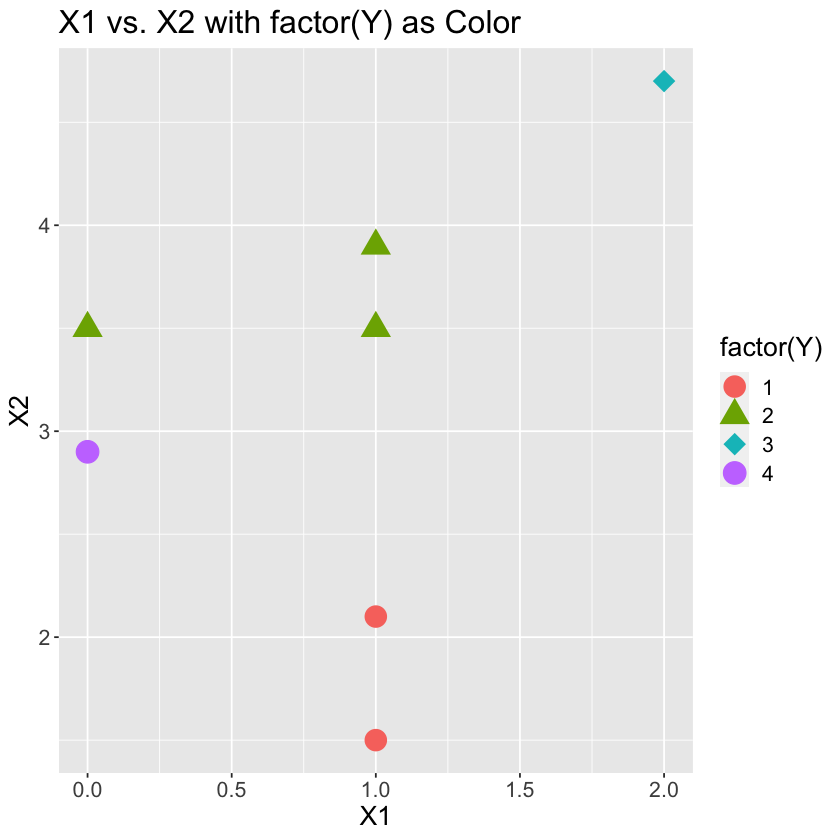

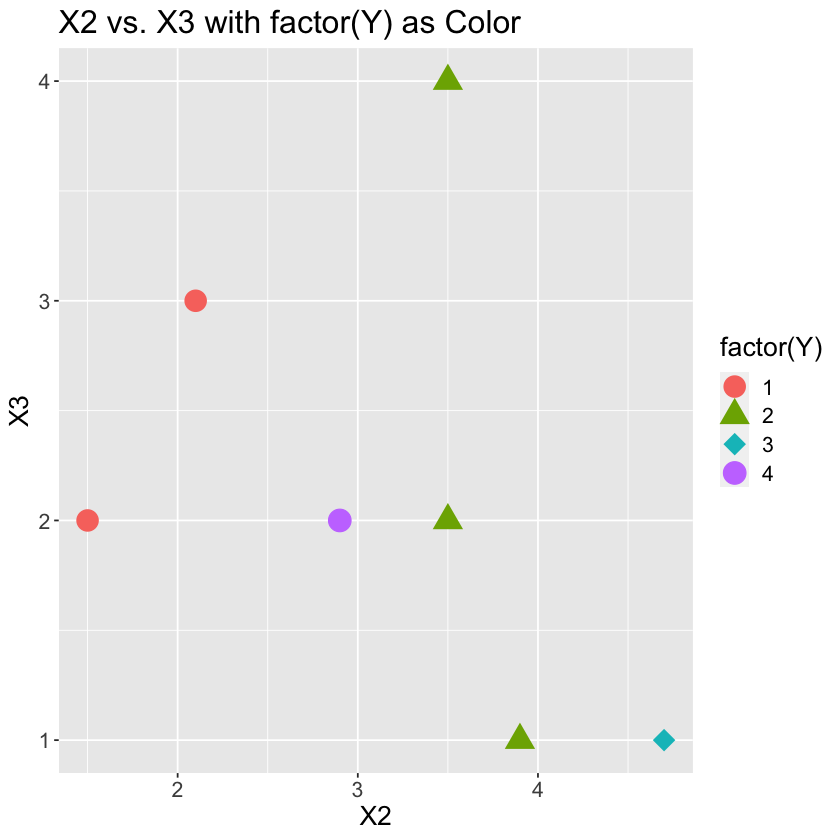

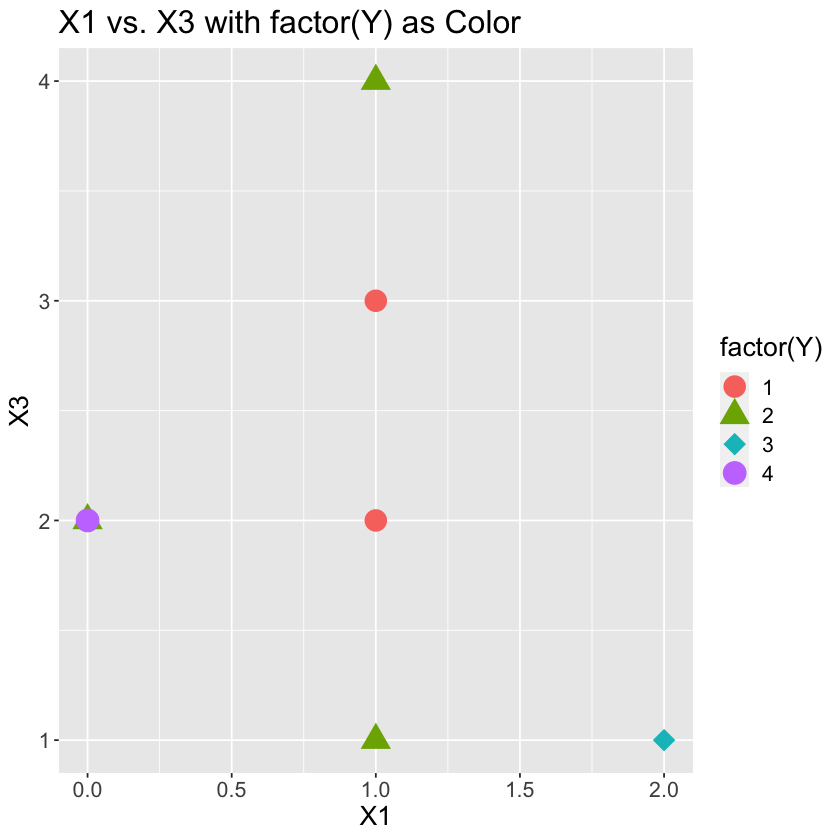

In [4]:
library(ggplot2)
library(gridExtra)

# Function to create scatter plots
create_scatter_plot <- function(x_var, y_var, color_var, shape_var) {
  ggplot(data, aes_string(x = x_var, y = y_var, color = color_var, shape = shape_var)) +
    geom_point(size = 6) + 
    labs(title = paste(x_var, "vs.", y_var, "with", color_var, "as Color")) +
    theme(
      text = element_text(size = 16)  # Set font size for all text elements
    ) +
    scale_shape_manual(values = c(16, 17, 18, 19)) 
}

# Create scatter plots using the function
plot1 <- create_scatter_plot("X1", "X2", "factor(Y)", "factor(Y)")
plot2 <- create_scatter_plot("X2", "X3", "factor(Y)", "factor(Y)")
plot3 <- create_scatter_plot("X1", "X3", "factor(Y)", "factor(Y)")

# Display the plots individually
print(plot1)
print(plot2)
print(plot3)

### Estimate the probability that a 60-year-old man with a family history of prostate cancer who is a smoker develops prostate cancer. (2 pts)

In [5]:
# Define the logistic regression equation
logistic_function <- function(age, family_history, smoking, beta0, beta1, beta2, beta3) {
  log_odds <- beta0 + beta1 * age + beta2 * family_history + beta3 * smoking
  odds <- exp(log_odds)
  probability <- odds / (1 + odds)
  return(probability)
}

# Given values
age <- 60
family_history <- 1  # Family history of prostate cancer (coded as 1)
smoking <- 1         # Smoker (coded as 1)
beta0 <- -3.5
beta1 <- 0.06
beta2 <- 1.2
beta3 <- 0.8

# Estimate the probability
probability <- logistic_function(age, family_history, smoking, beta0, beta1, beta2, beta3)
round(probability,2)


[1] 0.89

# PART II: Predicting Hospital length of stay

In [6]:
df <- read_csv('LengthOfStay.csv')

# remove first column
df <- df[, -1]

New names:
• `` -> `...1`
Rows: 3000 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): ...1, dialysisrenalendstage, asthma, irondef, pneum, substancedepe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## What are the dimensions of the dataset? (1 pt)

In [7]:
dim(df)

[1] 3000   21

## Use the cor() function to display the correlations of all continuous variables in the dataset. Which variables is most highly correlated with lengthofstay? (2 pts)

# ANSWER: hematocrit with a coefficient of -0.08 and bloodureanitro with coefficient of 0.19 are most highly correlated with lengthofstay

In [8]:
str(df)

tibble [3,000 × 21] (S3: tbl_df/tbl/data.frame)
 $ dialysisrenalendstage     : num [1:3000] 0 0 0 0 0 0 0 0 0 0 ...
 $ asthma                    : num [1:3000] 0 0 0 0 0 0 0 0 1 0 ...
 $ irondef                   : num [1:3000] 0 0 1 0 0 0 0 0 0 0 ...
 $ pneum                     : num [1:3000] 0 0 0 0 0 0 0 0 0 0 ...
 $ substancedependence       : num [1:3000] 0 0 1 0 0 0 0 0 0 0 ...
 $ psychologicaldisordermajor: num [1:3000] 0 0 1 0 0 0 0 0 0 0 ...
 $ depress                   : num [1:3000] 0 0 0 0 0 0 0 0 0 0 ...
 $ psychother                : num [1:3000] 0 0 0 0 0 0 0 0 0 0 ...
 $ fibrosisandother          : num [1:3000] 0 0 0 0 0 0 0 0 0 0 ...
 $ malnutrition              : num [1:3000] 0 0 0 0 0 0 0 0 0 0 ...
 $ hemo                      : num [1:3000] 0 0 0 0 0 1 0 0 0 0 ...
 $ hematocrit                : num [1:3000] 16.9 12.4 11.4 9.8 13.5 12.1 11.9 9.2 9.2 12.7 ...
 $ neutrophils               : num [1:3000] 20.1 7.8 8.7 8.2 4.7 12.9 9.4 13.6 16.7 10.2 ...
 $ sodium       

In [9]:
# Assuming 'data' is your dataframe and it contains continuous variables
# Adjust the threshold based on your understanding of the dataset
continuous_vars <- df[, sapply(df, function(x) is.numeric(x) && length(unique(x)) > 10)]


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




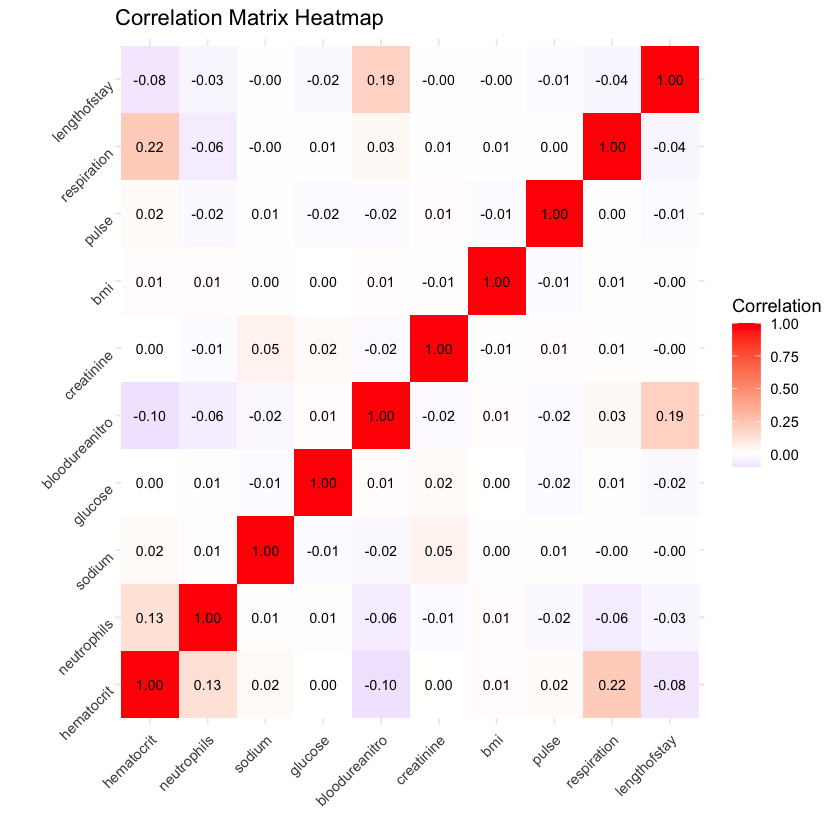

In [10]:
library(reshape2) # Ensure the reshape2 library is loaded for melt function
library(ggplot2)

# Calculate the correlation matrix for these continuous variables
cor_matrix <- cor(continuous_vars, use = "complete.obs") # 'use' parameter handles missing values

# Transform the correlation matrix to a long format suitable for ggplot2
cor_long <- reshape2::melt(cor_matrix)

# Create the heatmap
ggplot(cor_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = sprintf("%.2f", value)), size = 3) +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
        axis.text.y = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(x = '', y = '', fill = 'Correlation', title = "Correlation Matrix Heatmap")

### Run ridge regression with cross-validation and standardized features using the canned function cv.glmnet from the package glmnet. You can use the $\lambda$ sequence generated by cv.glment (you do not need to provide your own $\lambda$ sequence). In order to receive credit for this question, make the line immediately preceding this command say set.seed(222) and run the two lines together. Please report all numbers by rounding to three decimal places. (2 pts)

In [11]:
# set seed
set.seed(222)

# Run ridge regression with cross-validation
ridge_cv <- cv.glmnet(x = as.matrix(df[, -which(names(df) == "lengthofstay")]), 
                      y = df$lengthofstay, alpha = 0, standardize = TRUE)

In [12]:
# get cv errors
cv_error <- ridge_cv$cvm
standard_error <- ridge_cv$cvsd

Which $\lambda$ had the lowest mean cross-validation error? (1 pt)

In [13]:
best_lambda <- ridge_cv$lambda.min
round(best_lambda, 3)

[1] 0.189

What was the cross-validation error? (1 pt)

In [14]:
min_cv_error <- min(ridge_cv$cvm)
round(min_cv_error, 3)

[1] 4.874

What was the standard error of the mean cross-validation error for this value of$\lambda$? (1 pt)

In [15]:
standard_error <- ridge_cv$cvsd[which.min(ridge_cv$cvm)]
round(standard_error, 3)

[1] 0.148

What was the largest value of $\lambda$ whose mean CV error was within one standard deviation of the lowest CV error?

In [16]:
lambda_within_sd <- ridge_cv$lambda.1se
round(lambda_within_sd, 3)

[1] 2.802

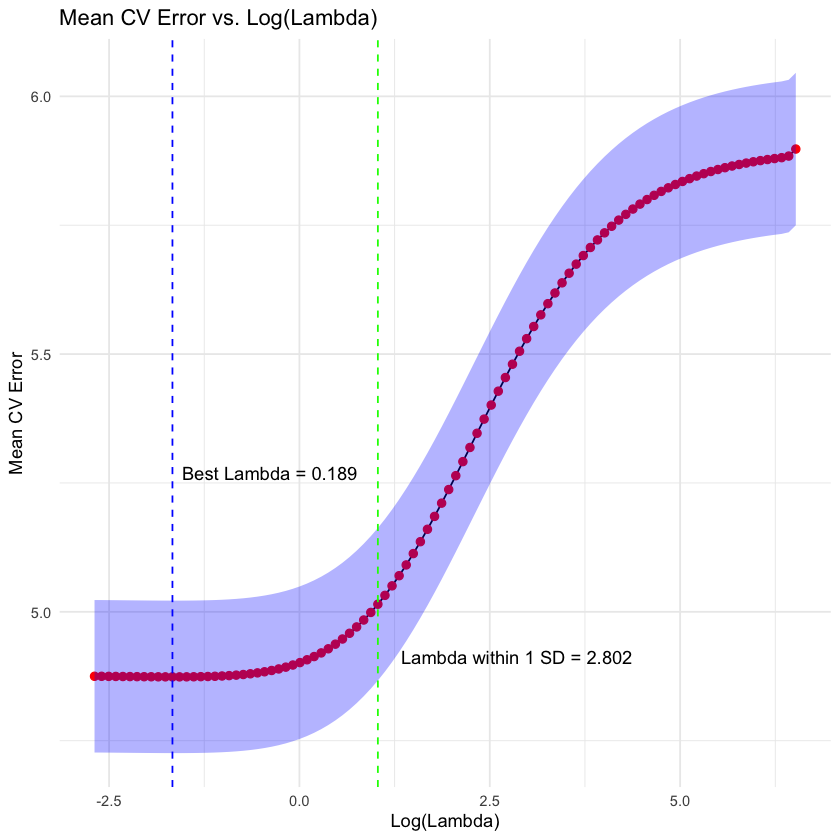

In [17]:
library(ggplot2)
library(glmnet)

# Assuming ridge_cv is the result from cv.glmnet

# Extracting necessary components from ridge_cv
lambda <- ridge_cv$lambda
cv_error <- ridge_cv$cvm

# Calculate upper and lower bounds for shading
upper_bound_sd <- cv_error + standard_error
lower_bound_sd <- cv_error - standard_error

# Create a dataframe for plotting
df_plot <- data.frame(lambda, cv_error, upper_bound_sd, lower_bound_sd)

# Plot mean cross-validation error with shaded region for one standard deviation
ggplot(df_plot, aes(x = log(lambda), y = cv_error)) +
  geom_line() +
  geom_point(color = "red", size = 2) +
  geom_ribbon(aes(ymin = lower_bound_sd, ymax = upper_bound_sd), fill = "blue", alpha = 0.3) +
  geom_vline(xintercept = log(best_lambda), linetype = "dashed", color = "blue") +
  geom_vline(xintercept = log(lambda_within_sd), linetype = "dashed", color = "green") +
  annotate("text", x = best_lambda, y = min(cv_error), label = paste("Best Lambda =", round(best_lambda, 3)), hjust = 0.75, vjust = -15) +  
  annotate("text", x = log(lambda_within_sd), y = min(cv_error), label = paste("Lambda within 1 SD =", round(lambda_within_sd, 3)), hjust = -0.1, vjust = -1) +
  labs(x = "Log(Lambda)", y = "Mean CV Error", title = "Mean CV Error vs. Log(Lambda)") +
  theme_minimal()


### Now consider the same prediction problem. Implement your own 5-fold cross-validation routine for KNN for $K = 1, ..., 50$ (write the cross-validation routine yourself rather than using a canned package). Include the snippet of code you wrote here. It should not exceed 20 lines. (6pts)

In [18]:
x <- as.matrix(df[, -which(names(df) == "lengthofstay")])

# Standardize the features in x
x_scaled <- scale(x)

y <- df$lengthofstay

In [19]:
library(class) 
set.seed(222)

indices <- sample(1:nrow(x_scaled))
fold_sizes <- cut(1:nrow(x_scaled), breaks=5, labels=FALSE)
cv_errors <- sapply(1:50, function(k) {
  fold_errors <- numeric(5)
  for (i in 1:5) {
    test_indices <- which(fold_sizes == i)
    train_indices <- setdiff(indices, test_indices)
    pred <- knn(x_scaled[train_indices, ], x_scaled[test_indices, ], cl=y[train_indices], k=k)
    fold_errors[i] <- mean(pred != y[test_indices])
  }
  mean(fold_errors)
})
print(cv_errors)


Attaching package: ‘class’


The following objects are masked from ‘package:FNN’:

    knn, knn.cv




 [1] 0.7803333 0.7920000 0.7703333 0.7536667 0.7440000 0.7460000 0.7373333
 [8] 0.7370000 0.7296667 0.7233333 0.7206667 0.7160000 0.7166667 0.7206667
[15] 0.7166667 0.7103333 0.7133333 0.7116667 0.7133333 0.7086667 0.7090000
[22] 0.7110000 0.7060000 0.7116667 0.7086667 0.7040000 0.7070000 0.7043333
[29] 0.7080000 0.7050000 0.7076667 0.7073333 0.7083333 0.7073333 0.7083333
[36] 0.7066667 0.7113333 0.7086667 0.7110000 0.7100000 0.7126667 0.7143333
[43] 0.7116667 0.7130000 0.7143333 0.7143333 0.7163333 0.7130000 0.7160000
[50] 0.7130000


Plot of mean cross-validation MSE as a function of $k$.

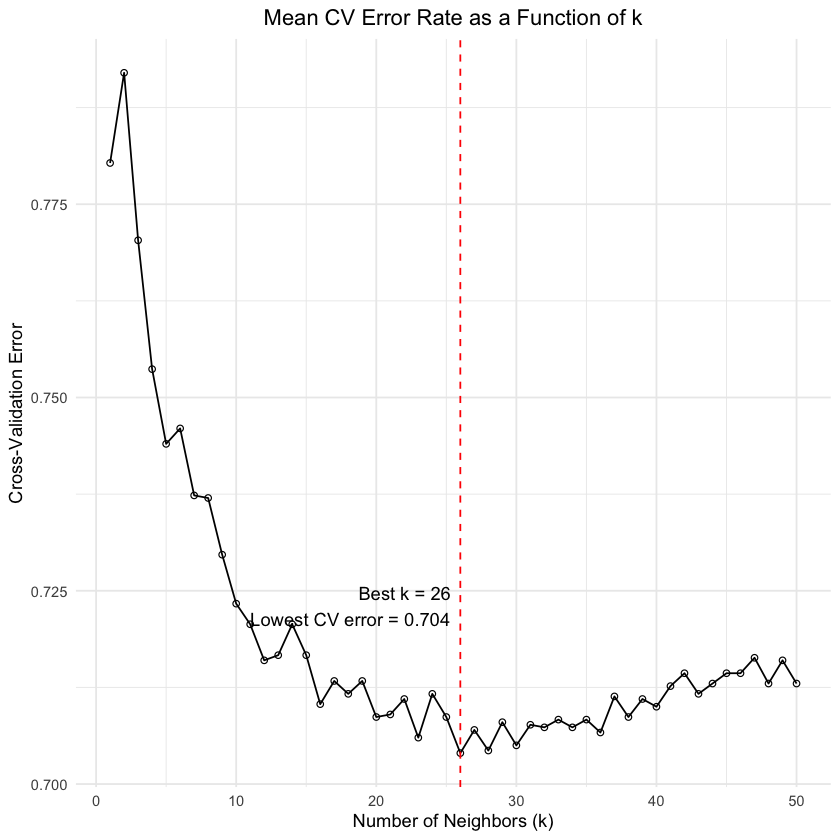

In [20]:
# Define the range of k values
k_values <- 1:50

# Find the k value with the minimum CV error
best_k <- which.min(cv_errors)

# Create a data frame for plotting
cv_errors_df <- data.frame(k = k_values, CV_Error = cv_errors)

# Plotting using ggplot2, highlighting the best k
ggplot(cv_errors_df, aes(x = k, y = CV_Error)) + 
  geom_line() +  # Draws the line through the points
  geom_point(shape = 1) + 
  geom_vline(xintercept = k_values[best_k], linetype = "dashed", color = "red") + 
  annotate("text", x = k_values[best_k], y = max(cv_errors), label = paste("Best k =", k_values[best_k]), hjust = 1.1, vjust = 40) +
  annotate("text", x = k_values[best_k], y = max(cv_errors), label = paste("Lowest CV error =", round(cv_errors[best_k],3)), hjust = 1.05, vjust = 42) +
  theme_minimal() + 
  labs(title = "Mean CV Error Rate as a Function of k",
       x = "Number of Neighbors (k)",
       y = "Cross-Validation Error") +
  theme(plot.title = element_text(hjust = 0.5))


The best k according to CV is

In [21]:
best_k <- which.min(cv_errors)

cat("The best K according to CV is", best_k, "\n")

The best K according to CV is 26 


The cross-validation error for the best k is

In [22]:
cv_error_best_k <- cv_errors[best_k]

cat("CV error for the best k is", round(cv_error_best_k,3), "\n")

CV error for the best k is 0.704 
